In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_excel('C:/Users/amaan/Desktop/Courses/Data Science/Project 1/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Detecting missing values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# Dropping the NaN values to further preprocess the training data
train_data.dropna(inplace=True)

In [6]:
train_data.shape

(10682, 11)

In [7]:
# After dropping, were left with no missing values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Feature engineering

In [9]:
#Function to change the data type object into datetime
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
#Extracting information from 'date_of_journey' column and storing in new columns
train_data['journey.day'] = train_data['Date_of_Journey'].dt.day
train_data['journey.month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey.day,journey.month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-11 05:50:00,2021-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-11 18:05:00,2021-05-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-11 16:50:00,2021-05-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
#Since we have converted Date_of_Journey column into integer type by creating two new columns, we can drop it.
train_data.drop('Date_of_Journey', axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey.day,journey.month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-11 05:50:00,2021-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-11 18:05:00,2021-05-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-11 16:50:00,2021-05-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [17]:
#Fuction for extracting hours 
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

#Fuction for extracting minutes 
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute

#Function to drop the column
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [19]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Data Pre-processing 

In [21]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:         # Check if duration contains only hour or mins
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'    #Adds 0 minutes
        else:
            duration[i]='0h '+ duration[i]     #Adds 0 hours

In [22]:
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
'19h 0m'.split(' ')[1][0:-1]

'0'

In [25]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [26]:
#Extracting hours from Duration
train_data['Duration_hours'] = train_data['Duration'].apply(hour)

#Extracting minutes from Duration
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [27]:
drop_column(train_data,'Duration')

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey.day             int64
journey.month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [30]:
#Converting the data type from object to integer
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)

#Converting the data type from object to integer
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey.day             int64
journey.month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [32]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col #Display the categorical data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col #Display the continous data

['Price',
 'journey.day',
 'journey.month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## Handling Categorical Data

In [34]:
categorical=train_data[cat_col]

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

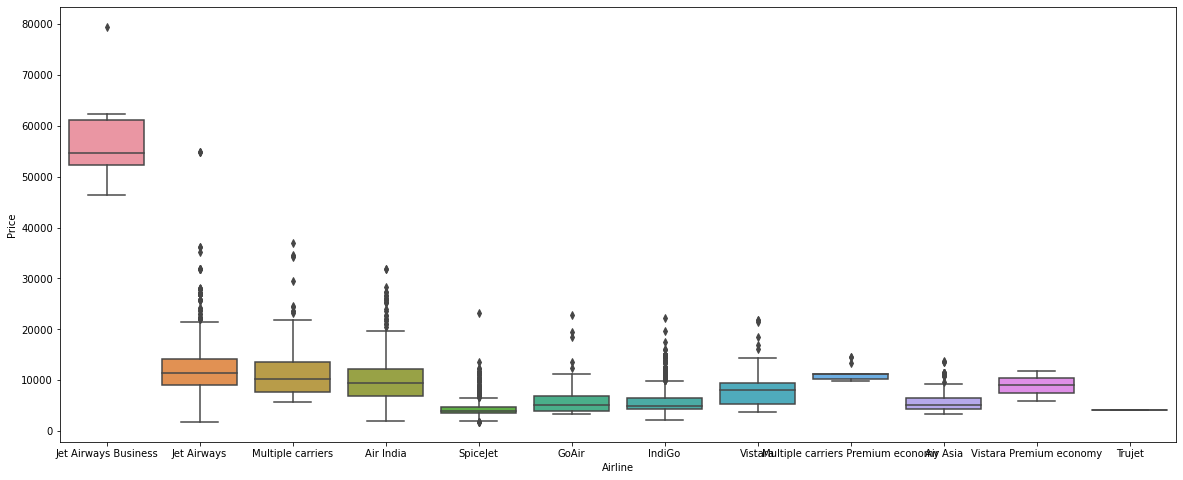

In [37]:
#Airline vs Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

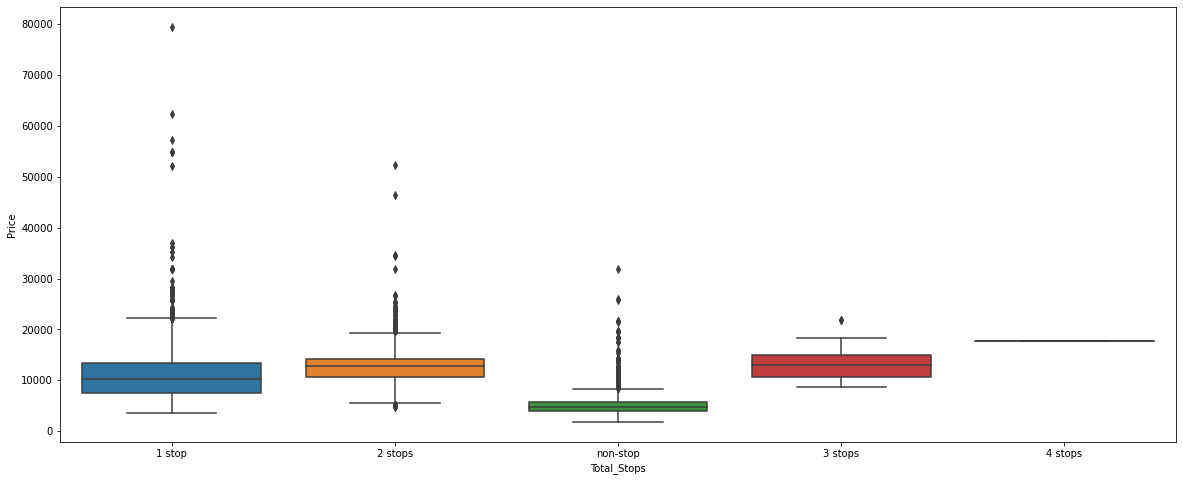

In [38]:
#Total Stops vs Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))

In [39]:
#Performing OneHot Encoding for Norminal values
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [40]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

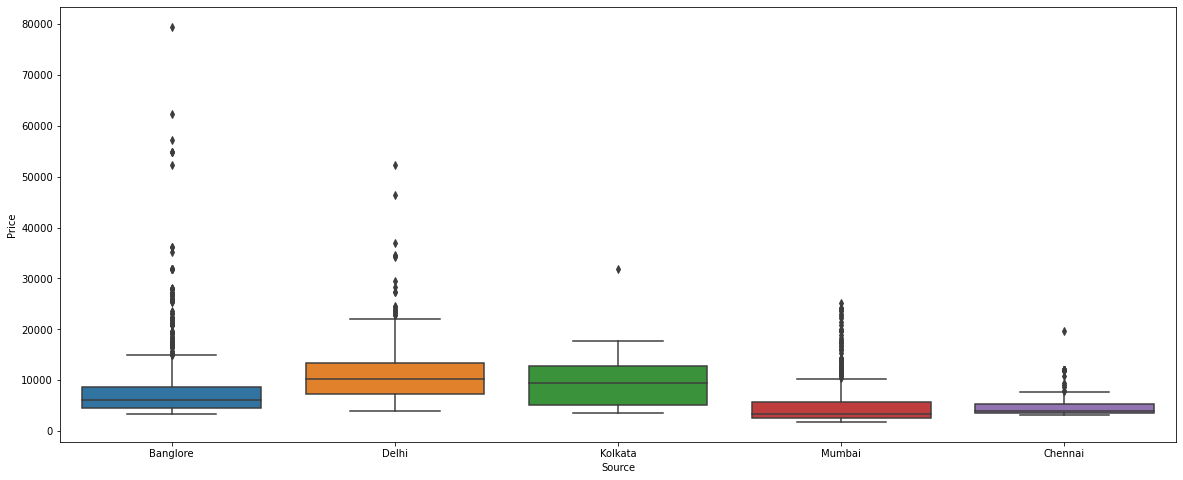

In [41]:
#Source vs Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))

In [42]:
#Performing OneHot Encoding for Norminal values
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [43]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

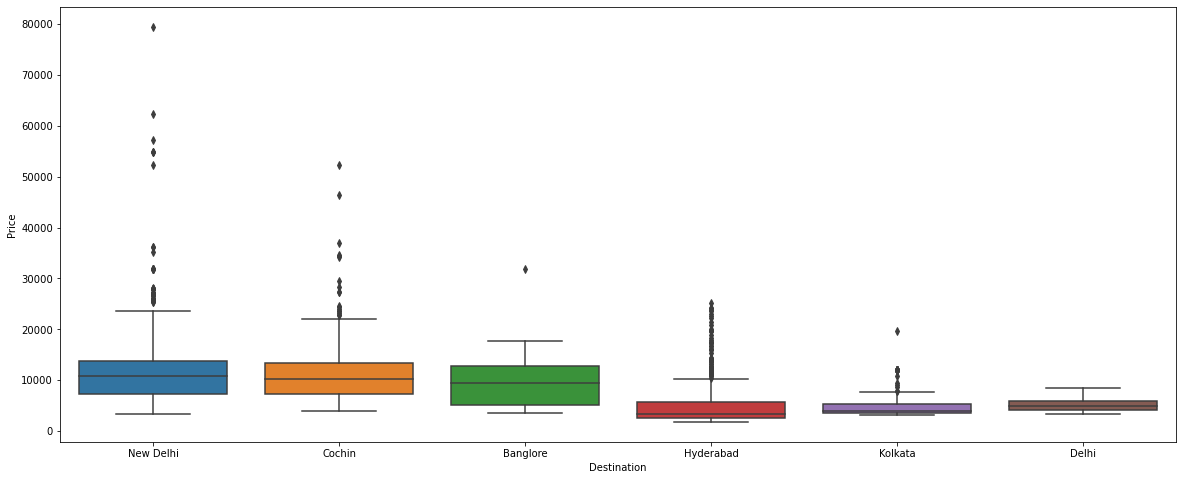

In [44]:
#Destination vs Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False))

In [45]:
#Performing OneHot Encoding for Norminal values
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [49]:
drop_column(categorical,'Route')
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [51]:
#Filling the Null Values
for i in ('Route_3', 'Route_4', 'Route_5'):
    categorical[i].fillna('None', inplace=True)

In [52]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [53]:
#Extracting how many categories in each cat_feature
for i in categorical.columns:
    print('{} has a total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has a total 12 categories
Source has a total 5 categories
Destination has a total 6 categories
Total_Stops has a total 5 categories
Additional_Info has a total 10 categories
Route_1 has a total 5 categories
Route_2 has a total 45 categories
Route_3 has a total 30 categories
Route_4 has a total 14 categories
Route_5 has a total 6 categories


In [54]:
#Since we have lots of features in Route , one hot encoding will not be a better option, we appply Label Encoding
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder=LabelEncoder()

In [56]:
#Converting the data into integers
for i in ('Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'):
    categorical[i]=encoder.fit_transform(categorical[i])

In [57]:
#Since Additional_Info contains almost 80% no_info,so we can drop this column
drop_column(categorical,'Additional_Info')

In [58]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [59]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [61]:
#Assigning values their corresponding keys using dictionary
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [63]:
train_data[cont_col]

,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [64]:
# Concatenating the dataframe --> categorical + Airline + Source + Destination
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [65]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [66]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## Outlier Detection

In [67]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 1440x2160 with 0 Axes>

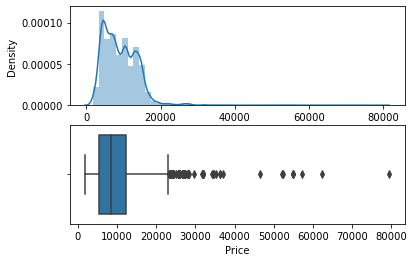

In [68]:
plt.figure(figsize=(20,30))
plot(data_train,'Price')

In [69]:
#Dealing with Outliers
data_train['Price']=np.where(data_train['Price']>=40000 , data_train['Price'].median() , data_train['Price'])

<Figure size 1440x2160 with 0 Axes>

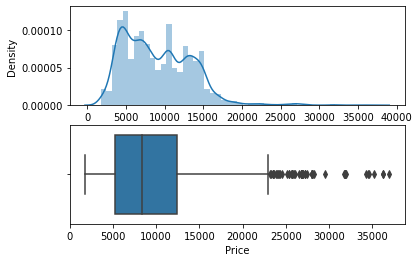

In [70]:
plt.figure(figsize=(20,30))
plot(data_train,'Price')

## Separate Independent & Dependent Values

In [71]:
#Here X is independent variable
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey.day,journey.month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [72]:
#Here y is dependent variable
y=data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

## Feature Selection

In [74]:
#Feature Selection using Information Gain
from sklearn.feature_selection import mutual_info_classif

In [75]:
mutual_info_classif(X,y)

array([2.15591818e+00, 2.04247569e+00, 2.79024545e+00, 2.25793090e+00,
       1.43027040e+00, 7.44795699e-01, 7.51815170e-01, 9.50433244e-02,
       6.70431143e-01, 9.39975971e-01, 6.89232616e-03, 5.73886407e-01,
       4.20891860e-03, 3.23376197e-01, 0.00000000e+00, 2.25115990e-01,
       1.24248174e-03, 1.72803108e-01, 1.50352999e+00, 8.69099282e-01,
       2.87924294e-01, 1.54908068e+00, 3.96940057e-01, 3.02743325e-01,
       1.69311291e-01, 3.65610017e-01, 1.05581645e+00, 8.91977859e-01,
       1.41515250e+00, 1.19848737e+00, 1.85123834e+00, 1.51467052e+00,
       1.77224965e+00, 1.07098501e+00])

In [76]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.158840
Route_1,2.063992
Route_2,2.808839
Route_3,2.271214
Route_4,1.469380
Route_5,0.734280
Air India,0.744569
GoAir,0.091210
IndiGo,0.685477
Jet Airways,0.915663


In [77]:
#Sorting based on the importance
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.808839
Route_3,2.271214
Total_Stops,2.158840
Route_1,2.063992
Arrival_Time_hour,1.850760
Duration_hours,1.803308
Cochin,1.557015
Arrival_Time_minute,1.536922
Delhi,1.532129
Route_4,1.469380


## Splitting dataset into train and test

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,predictions))
    print('MSE:',metrics.mean_squared_error(y_test,predictions))
    print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

In [81]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9531253088105799
Predictions are: [ 6623.13333333  4172.66       11173.008      ...  8518.54880952
 12253.0675      3725.4       ]


r2 score: 0.8275739792070835
MAE: 1128.5156110069543
MSE: 3230652.084857547
RMSE: 33.59338641767088


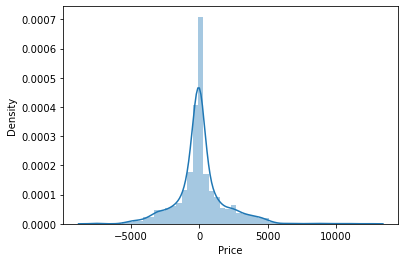

In [82]:
predict(RandomForestRegressor())

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.9669895602862111
Predictions are: [ 7229.  4174. 10262. ...  7064. 12192.  3625.]


r2 score: 0.7188635963668347
MAE: 1320.344961784433
MSE: 5267499.09526504
RMSE: 36.336551319359316


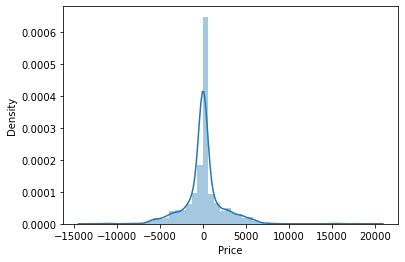

In [84]:
predict(DecisionTreeRegressor())

Training Score: 0.7824008284297643
Predictions are: [ 7059.4  4762.  12933.2 ... 13572.4 11152.6  3870.6]


r2 score: 0.6512254220459901
MAE: 1678.2654188114177
MSE: 6534798.589162378
RMSE: 40.96663787536656


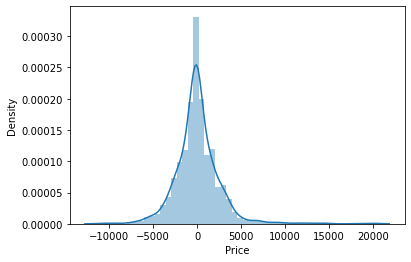

In [85]:
predict(KNeighborsRegressor())

Training Score: 0.6161614076447528
Predictions are: [ 6706.11536868  5379.20180269 12621.38803815 ... 12804.87521403
 10784.79643013  2984.74355326]


r2 score: 0.6130768542622695
MAE: 1914.7141569492837
MSE: 7249567.447586727
RMSE: 43.75744687420969


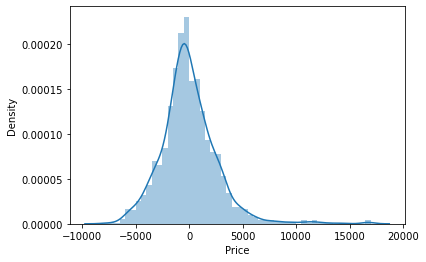

In [86]:
predict(LinearRegression())

## Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split = [5,10,15,100]

In [89]:
# Creating the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [90]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [91]:
# Initializing the estimator
reg_rf = RandomForestRegressor()

In [92]:
#Random searching of parameters using the 3-fold cross validation

rf_random =RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=1)

In [93]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13, total=   3.3s
[CV] n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13, total=   3.9s
[CV] n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13 
[CV]  n_estimators=760, min_samples_split=100, max_features=sqrt, max_depth=13, total=   3.2s
[CV] n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13, total=   1.6s
[CV] n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13, total=   1.7s
[CV] n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=320, min_samples_split=5, max_features=sqrt, max_depth=13, total=   1.6s
[CV] n_estimators=540, min_samples_split=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=540, min_samples_split=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=540, min_samples_split=10, max_features

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [95]:
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

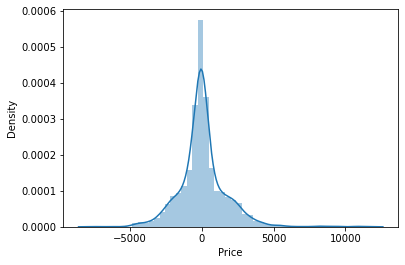

In [96]:
sns.distplot(y_test-prediction)

In [97]:
metrics.r2_score(y_test,prediction)

0.8565530132300189

In [98]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1084.062371271441
MSE 2687687.7674486763
RMSE 1639.4168986101968
